In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,r2_score

In [2]:
df = pd.read_csv(r'D:\Intellipat\DL\Assignment\Project\Census Imcome\census income\adult.csv',header=None)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
21862,45,State-gov,190406,Prof-school,15,Divorced,Prof-specialty,Unmarried,Black,Male,25236,0,36,United-States,>50K
8948,53,Private,196278,Some-college,10,Widowed,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
12107,32,Federal-gov,504951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,50,United-States,<=50K
3468,38,Local-gov,116580,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,20,United-States,>50K
20,40,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K


In [3]:
df.columns = [  'age',
                'workclass',
                'fnlwgt',
                'education',
                'education-num',
                'marital-status',
                'occupation',
                'relationship',
                'race',
                'sex',
                'capital-gain',
                'capital-loss',
                'hours-per-week',
                'native-countr','salary']

In [4]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-countr,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-countr   32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isnull().count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education-num     32561
marital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-countr     32561
salary            32561
dtype: int64

In [7]:
df = df.replace(to_replace=" ?",value=' x')

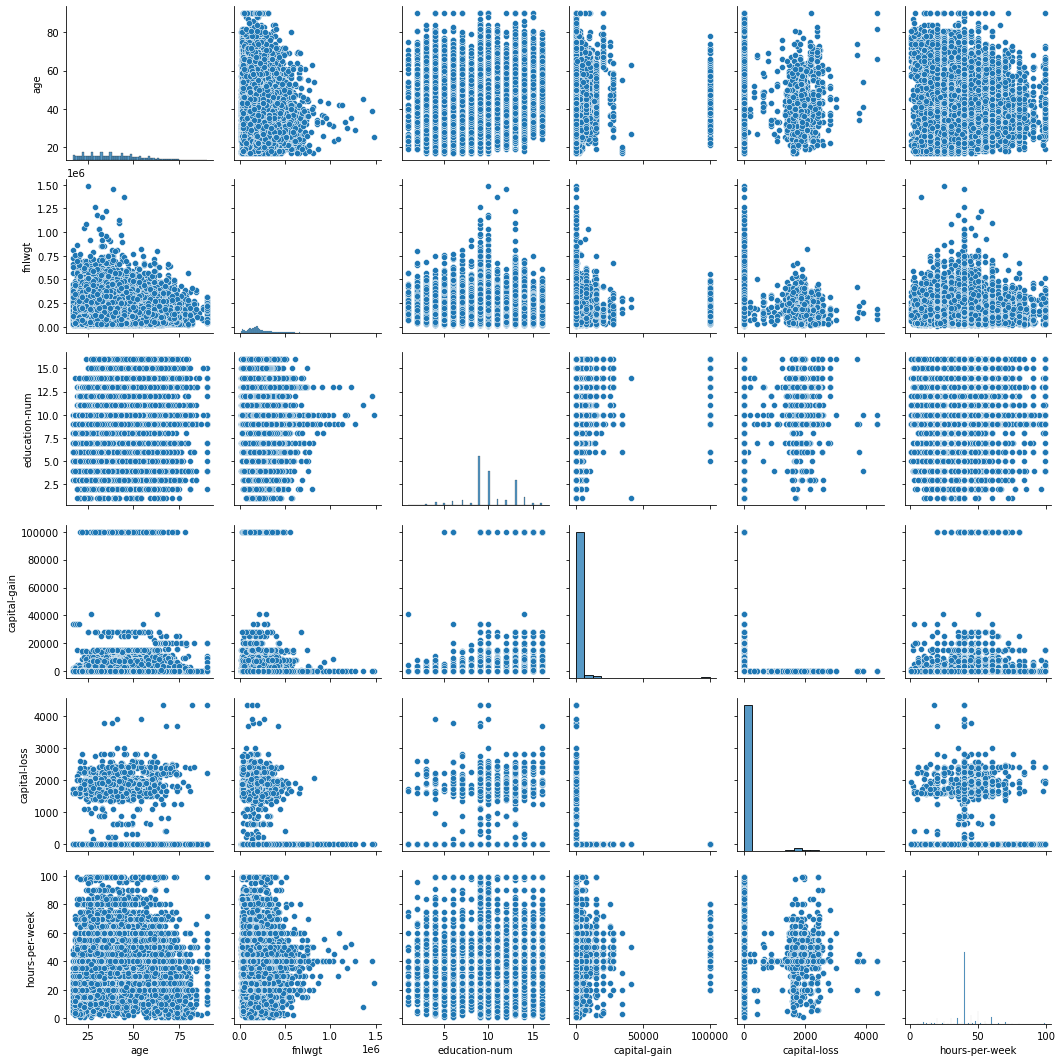

In [90]:
sns.pairplot(df)

<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

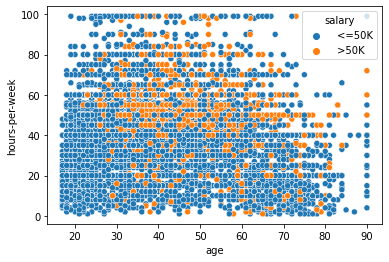

In [91]:
sns.scatterplot(x=df['age'],y=df['hours-per-week'],hue=df['salary'])

In [8]:
obj=[]
num=[]
for i in df.columns[:-1]:
    if df[i].dtype=='object':
        obj.append(i)
    else:
        num.append(i)
obj,num

(['workclass',
  'education',
  'marital-status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'native-countr'],
 ['age',
  'fnlwgt',
  'education-num',
  'capital-gain',
  'capital-loss',
  'hours-per-week'])

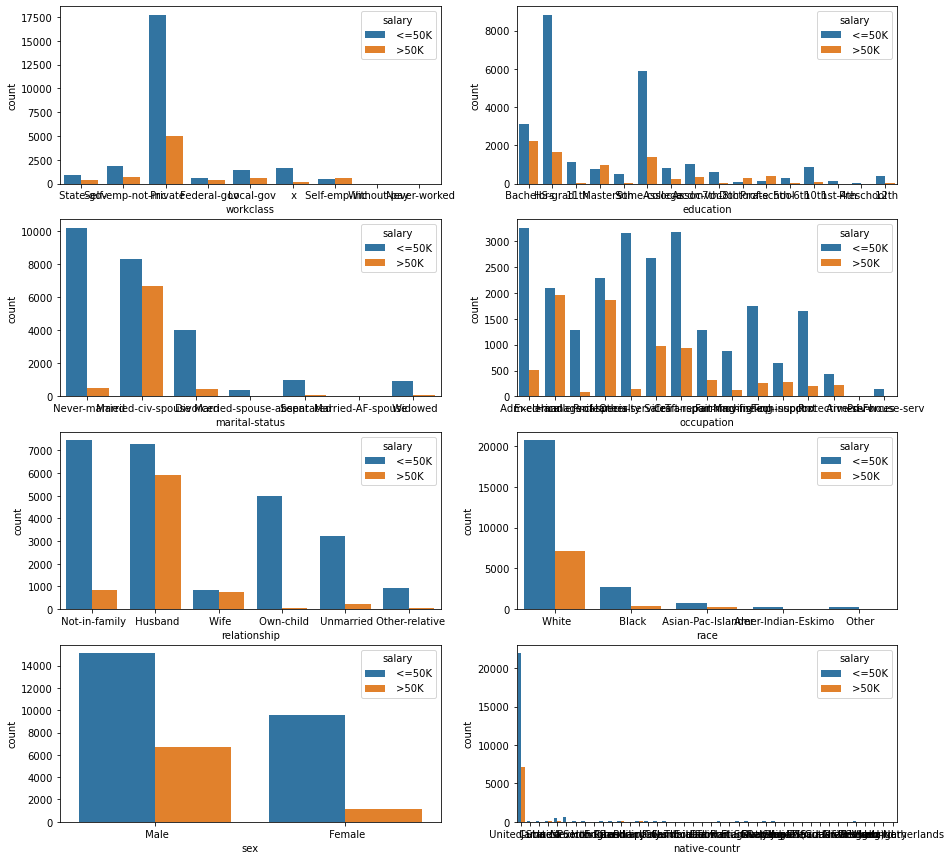

In [9]:
plt.figure(figsize=(15,15))
for j,i in enumerate(obj):
    plt.subplot(4,2,j+1)
    sns.countplot(x=df[i],hue=df['salary'])

<AxesSubplot:xlabel='salary', ylabel='count'>

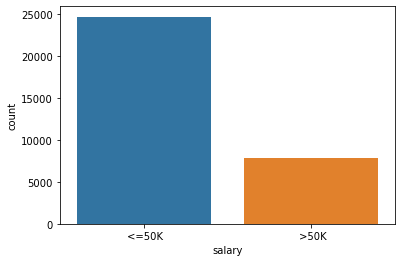

In [10]:
sns.countplot(x=df['salary'],)

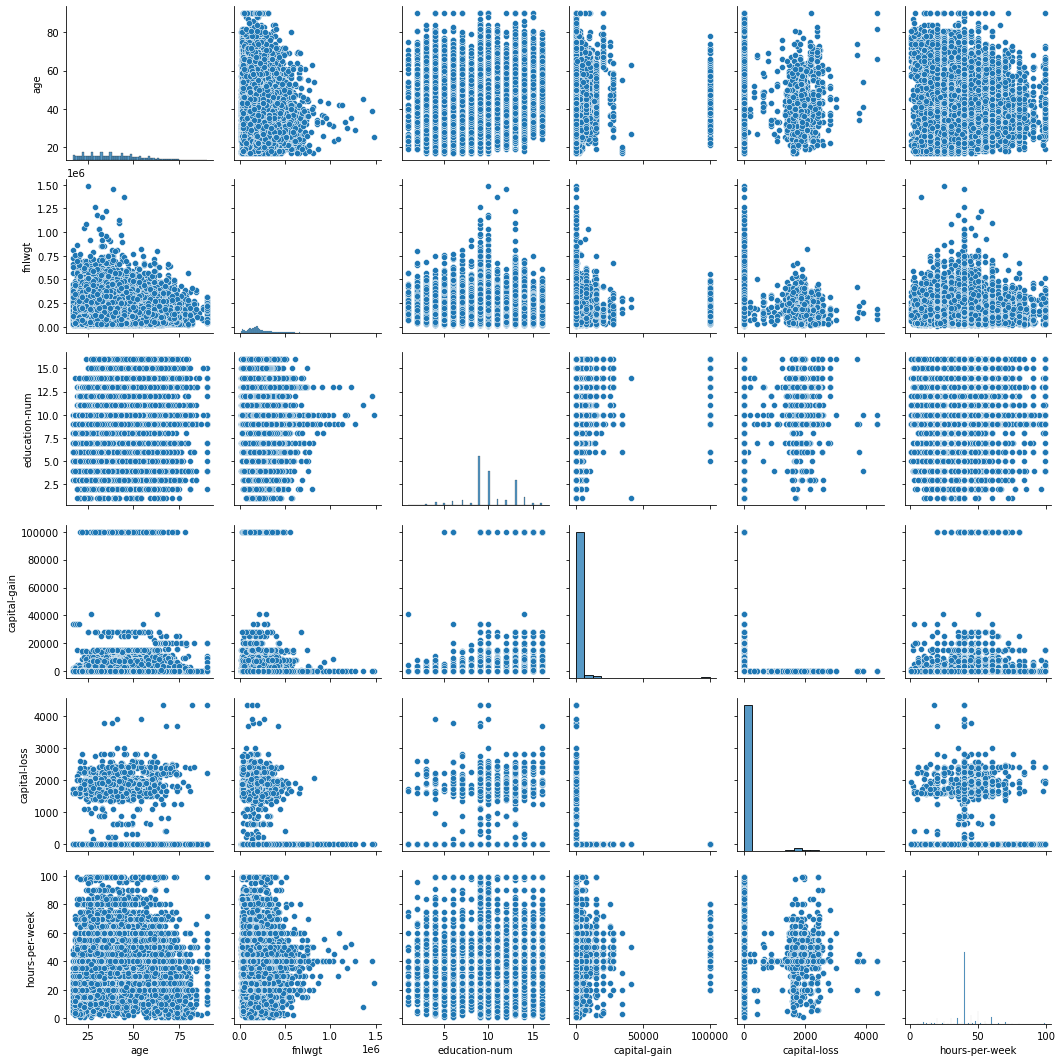

In [95]:
sns.pairplot(df[num])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
le = LabelEncoder()
ss = StandardScaler()
mm = MinMaxScaler()

In [12]:
for i in obj:
    df[i] = le.fit_transform(df[i])
df['salary'] = le.fit_transform(df['salary'])

In [13]:
# X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],train_size=0.8,random_state=1,stratify=df.iloc[:,-1])

In [14]:
X_train= df.iloc[:,:-1]
y_train=df.iloc[:,-1]

In [15]:
X_train[num] = ss.fit_transform(X_train[num])

In [16]:
test = pd.read_csv(r'D:\Intellipat\DL\Assignment\Project\Census Imcome\census income\adult_test.csv',header=None)
test.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
534,27,Self-emp-inc,214974,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,<=50K.
3389,58,Private,179715,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,47,United-States,>50K.
7149,40,Private,223730,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,38,United-States,<=50K.
6115,44,Self-emp-not-inc,177851,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,<=50K.
7728,38,Private,87556,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K.


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       16281 non-null  int64 
 1   1       16281 non-null  object
 2   2       16281 non-null  int64 
 3   3       16281 non-null  object
 4   4       16281 non-null  int64 
 5   5       16281 non-null  object
 6   6       16281 non-null  object
 7   7       16281 non-null  object
 8   8       16281 non-null  object
 9   9       16281 non-null  object
 10  10      16281 non-null  int64 
 11  11      16281 non-null  int64 
 12  12      16281 non-null  int64 
 13  13      16281 non-null  object
 14  14      16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [18]:
test.columns = [  'age',
                'workclass',
                'fnlwgt',
                'education',
                'education-num',
                'marital-status',
                'occupation',
                'relationship',
                'race',
                'sex',
                'capital-gain',
                'capital-loss',
                'hours-per-week',
                'native-countr','salary']

In [19]:
test.isnull().count()

age               16281
workclass         16281
fnlwgt            16281
education         16281
education-num     16281
marital-status    16281
occupation        16281
relationship      16281
race              16281
sex               16281
capital-gain      16281
capital-loss      16281
hours-per-week    16281
native-countr     16281
salary            16281
dtype: int64

In [20]:
test = test.replace(to_replace=" ?",value=' x')

In [21]:
for i in obj:
    test[i] = le.fit_transform(test[i])
test['salary'] = le.fit_transform(test['salary'])

In [22]:
test[num] = ss.transform(test[num])

In [23]:
X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

In [24]:
y_train.value_counts(),y_test.value_counts()

(0    24720
 1     7841
 Name: salary, dtype: int64,
 0    12435
 1     3846
 Name: salary, dtype: int64)

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')

In [26]:
X_train,y_train = smote.fit_resample(X_train,y_train)

In [27]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((49440, 14), (16281, 14), (49440,), (16281,))

0    24720
1    24720
Name: salary, dtype: int64

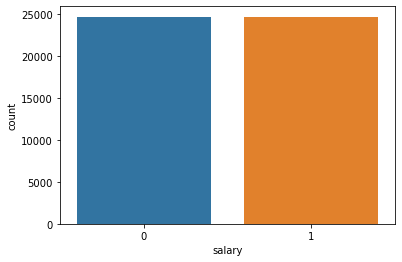

In [28]:
sns.countplot(x =y_train)
y_train.value_counts()

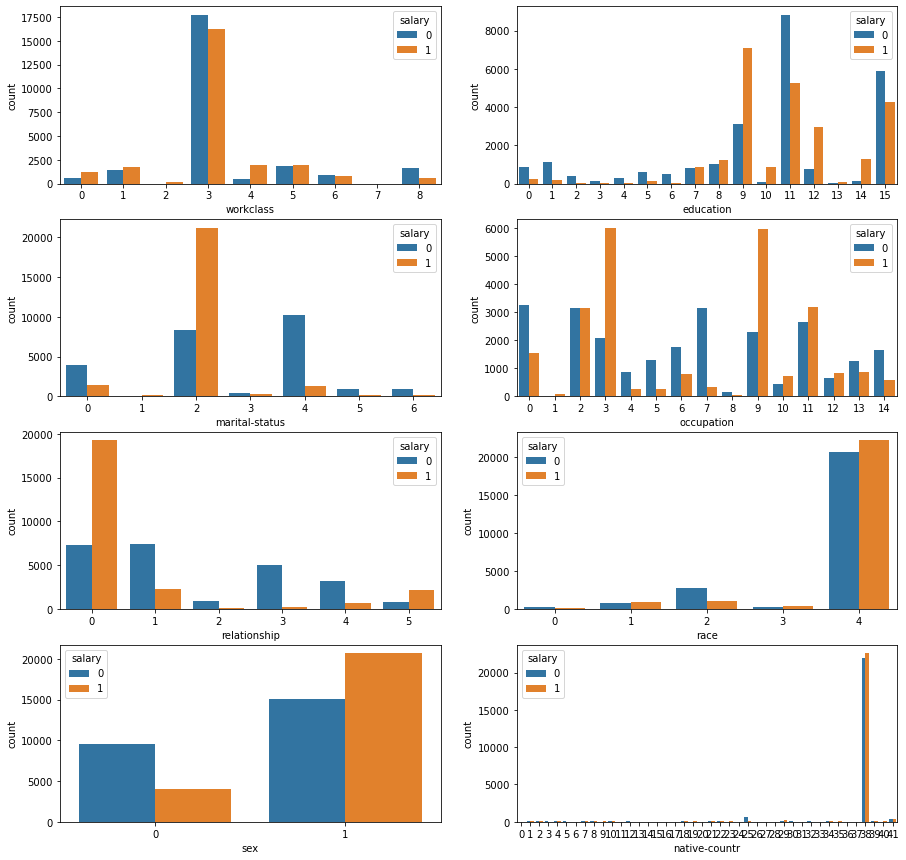

In [29]:
plt.figure(figsize=(15,15))
for j,i in enumerate(obj):
    plt.subplot(4,2,j+1)
    sns.countplot(x=X_train[i],hue=y_train)

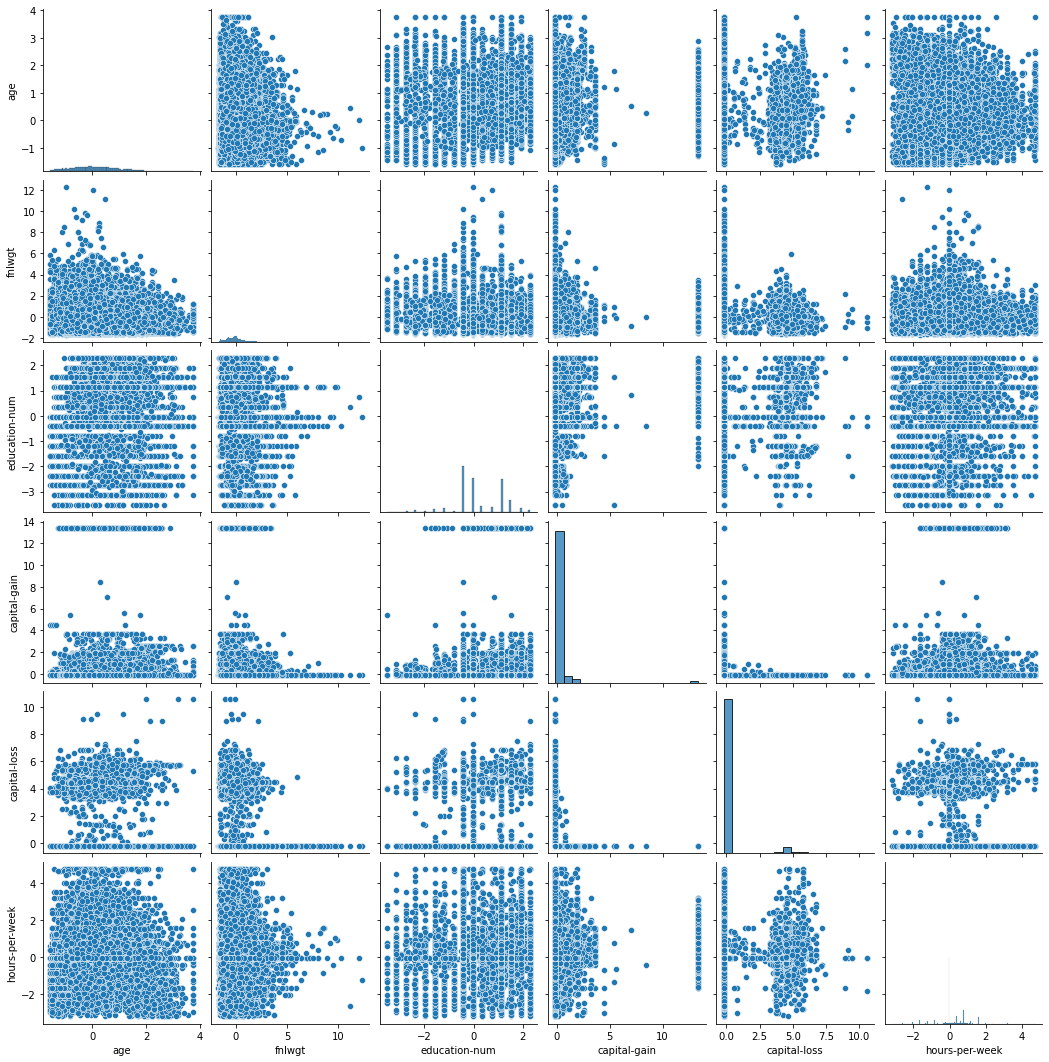

In [30]:
sns.pairplot(X_train[num])

In [31]:
# X_test[num] = ss.transform(X_test[num])

### Logistic Regression 

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [33]:
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

C:\Users\akpra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
lr.score(X_test,y_test)

0.7630980897979239

In [35]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83     12435
           1       0.50      0.76      0.60      3846

    accuracy                           0.76     16281
   macro avg       0.70      0.76      0.72     16281
weighted avg       0.81      0.76      0.78     16281



### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [37]:
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

In [38]:
rfc.score(X_test,y_test)

0.839690436705362

In [39]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89     12435
           1       0.65      0.70      0.67      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.79      0.78     16281
weighted avg       0.84      0.84      0.84     16281



### Support Vector Machine

In [35]:
from sklearn.svm import SVC
svc = SVC()

In [36]:
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

In [37]:
svc.score(X_test,y_test)

0.7568331183588232

In [38]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82     12435
           1       0.49      0.81      0.61      3846

    accuracy                           0.76     16281
   macro avg       0.71      0.78      0.72     16281
weighted avg       0.82      0.76      0.77     16281



### K-nearest Neighbours

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [41]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [42]:
y_pred_knn = knn.predict(X_test)

In [43]:
knn.score(X_test,y_test)

0.7857625452982003

In [44]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85     12435
           1       0.53      0.76      0.63      3846

    accuracy                           0.79     16281
   macro avg       0.72      0.78      0.74     16281
weighted avg       0.82      0.79      0.80     16281



### Gaussian Navie Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [46]:
gnb.fit(X_train,y_train)

GaussianNB()

In [47]:
y_pred_gnb = gnb.predict(X_test)

In [48]:
gnb.score(X_test,y_test)

0.822369633314907

In [49]:
print(classification_report(y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     12435
           1       0.68      0.48      0.56      3846

    accuracy                           0.82     16281
   macro avg       0.76      0.70      0.72     16281
weighted avg       0.81      0.82      0.81     16281



### Perceptron

In [50]:
from sklearn.linear_model import Perceptron
pc = Perceptron()

In [51]:
pc.fit(X_train,y_train)

Perceptron()

In [52]:
y_pred_pc = pc.predict(X_test)

In [53]:
pc.score(X_test,y_test)

0.627049935507647

In [54]:
print(classification_report(y_test,y_pred_pc))

              precision    recall  f1-score   support

           0       0.96      0.53      0.69     12435
           1       0.38      0.93      0.54      3846

    accuracy                           0.63     16281
   macro avg       0.67      0.73      0.61     16281
weighted avg       0.83      0.63      0.65     16281



# Hyperparameter Tuning

## Grid Search CV

In [60]:
from sklearn.model_selection import GridSearchCV

### Logistic Regression

In [61]:
del gs

NameError: name 'gs' is not defined

In [62]:
param_grids = {'C': [0.6,0.8,1.0,1.2,1.4], 
               'penalty' : ('l1', 'l2', 'elasticnet', 'none')}

In [63]:
gs = GridSearchCV(lr,param_grid=param_grids)

In [64]:
gs.fit(X_train,y_train)

C:\Users\akpra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akpra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.6, 0.8, 1.0, 1.2, 1.4],
                         'penalty': ('l1', 'l2', 'elasticnet', 'none')})

In [65]:
gs.best_params_

{'C': 1.2, 'penalty': 'l2'}

In [66]:
gs.best_index_

13

In [67]:
gs.cv_results_['params'][13]

{'C': 1.2, 'penalty': 'l2'}

In [68]:
gs.best_score_

0.7755461165048544

In [69]:
gs.score(X_test,y_test)

0.7637737239727289

### Random Forest

In [70]:
del gs

In [73]:
param_grids = {'criterion' : ("gini","entropy"),
              'max_depth': [50]}

In [74]:
gs = GridSearchCV(rfc, param_grid=param_grids)

In [75]:
gs.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'), 'max_depth': [50]})

In [76]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 50}

In [77]:
gs.cv_results_['params']

[{'criterion': 'gini', 'max_depth': 50},
 {'criterion': 'entropy', 'max_depth': 50}]

In [78]:
gs.best_score_

0.8936690938511328

In [79]:
gs.score(X_test,y_test)

0.8388919599533198

### SVC

In [ ]:
del gs

In [81]:
param_grids = {'kernel': ('linear','rbf'),
              'C': [0.6,0.8,1.0,1.2,1.4] }

In [ ]:
gs = GridSearchCV(svc, param_grid=param_grids)
gs.fit(X_train,y_train)

In [ ]:
gs.best_params_

In [ ]:
gs.best_score_

In [ ]:
gs.score(X_test,y_test)

### KNN

In [97]:
del gs

In [98]:
param_grids = {'n_neighbors': list(range(5,10)),
              'p': [1,2] }

In [99]:
gs = GridSearchCV(knn,param_grid=param_grids)
gs.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9], 'p': [1, 2]})

In [100]:
gs.best_params_

{'n_neighbors': 5, 'p': 1}

In [101]:
gs.best_score_

0.8619943365695792

In [102]:
gs.score(X_test,y_test)

0.794914317302377

### GNB

In [85]:
del gs

In [92]:
param_grids = {'var_smoothing':[1e-08,1e-09,1e-10]}

In [93]:
gs = GridSearchCV(gnb, param_grid=param_grids)
gs.fit(X_train,y_train)

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-08, 1e-09, 1e-10]})

In [94]:
gs.best_params_

{'var_smoothing': 1e-08}

In [95]:
gs.best_score_

0.7143001618122977

In [96]:
gs.score(X_test,y_test)

0.8227381610466188

### Perceptron

In [110]:
del gs

In [111]:
param_grids = { 'penalty': ['l2','l1','elasticnet',None],
              'alpha': [0.00001,0.0001,0.001],
              'eta0':[0.8,1.0,1.2]}

In [112]:
gs = GridSearchCV(pc, param_grid=param_grids)
gs.fit(X_train,y_train)

GridSearchCV(estimator=Perceptron(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001],
                         'eta0': [0.8, 1.0, 1.2],
                         'penalty': ['l2', 'l1', 'elasticnet', None]})

In [113]:
gs.best_params_

{'alpha': 0.001, 'eta0': 0.8, 'penalty': 'l1'}

In [114]:
gs.best_score_

0.731715210355987

In [115]:
gs.score(X_test,y_test)

0.7495854063018242

## Random Search CV

In [117]:
from sklearn.model_selection import RandomizedSearchCV

In [152]:
def rs(X_train,y_train,X_test,y_test,estimator,param_grids):
    rs = RandomizedSearchCV(estimator,param_distributions=param_grids,n_iter=5)
    rs.fit(X_train,y_train)
    print("Best Parameter:\n",rs.best_params_)
    print("Best Score:\n",rs.best_score_)
    print("Test score\n",rs.score(X_test,y_test))
    print(classification_report(y_test,y_pred_pc))

### Random Forest

In [151]:
del rs

In [133]:
param_grids = {'criterion' : ("gini","entropy"),
              'max_depth': [40,50,60]}

In [134]:
rs = RandomizedSearchCV(rfc,param_distributions=param_grids,n_iter=5)
rs.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': [40, 50, 60]})

In [135]:
rs.best_params_

{'max_depth': 40, 'criterion': 'entropy'}

In [136]:
rs.best_score_

0.89375

In [137]:
rs.score(X_test,y_test)

0.8399975431484552

### GNB

In [156]:
estimator = gnb
param_grids = {'var_smoothing':[1e-04,1e-05,1e-06,1e-07,1e-08]}
rs(X_train,y_train,X_test,y_test,estimator,param_grids)

Best Parameter:
 {'var_smoothing': 0.0001}
Best Score:
 0.7187095469255663
Test score
 0.8256863829003133
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     12435
           1       0.63      0.54      0.58      3846

    accuracy                           0.82     16281
   macro avg       0.75      0.72      0.73     16281
weighted avg       0.81      0.82      0.81     16281



## Halving Random Search

In [56]:
from sklearn.experimental import enable_halving_search_cv

In [57]:
from sklearn.model_selection import HalvingRandomSearchCV

In [79]:
def hrs(X_train,y_train,X_test,y_test,estimator,param_grids):
    hrs = HalvingRandomSearchCV(estimator,param_distributions=param_grids,factor=5,cv=10)
    hrs.fit(X_train,y_train)
    print("Best Parameter:\n",hrs.best_params_)
    print("Best Score:\n",hrs.best_score_)
    print("Test score\n",hrs.score(X_test,y_test))
    print(classification_report(y_test,y_pred_pc))

### Random Forest

In [80]:
estimator = rfc
param_grids = {'criterion' : ("gini","entropy"),
              'max_depth': [40,50,60],
               'max_features' : ["sqrt", "log2", None] }
hrs(X_train,y_train,X_test,y_test,estimator,param_grids)

C:\Users\akpra\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 18 is smaller than n_iter=1236. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameter:
 {'max_features': 'sqrt', 'max_depth': 60, 'criterion': 'entropy'}
Best Score:
 0.8
Test score
 0.8386462747988452
              precision    recall  f1-score   support

           0       0.96      0.53      0.69     12435
           1       0.38      0.93      0.54      3846

    accuracy                           0.63     16281
   macro avg       0.67      0.73      0.61     16281
weighted avg       0.83      0.63      0.65     16281



### Gaussian Navie Bayes

In [81]:
estimator = gnb
param_grids = {'var_smoothing':[1e-04,1e-05,1e-06,1e-07,1e-08]}
hrs(X_train,y_train,X_test,y_test,estimator,param_grids)

C:\Users\akpra\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 5 is smaller than n_iter=1236. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameter:
 {'var_smoothing': 1e-08}
Best Score:
 0.705
Test score
 0.822369633314907
              precision    recall  f1-score   support

           0       0.96      0.53      0.69     12435
           1       0.38      0.93      0.54      3846

    accuracy                           0.63     16281
   macro avg       0.67      0.73      0.61     16281
weighted avg       0.83      0.63      0.65     16281

